# Combined Cycle Power Plant Data Set

##### Name: Huiqi Wang
##### Github Username: wang2bbq
##### USC ID: 6613859213

## a.b. Exploring the data

### i. rows, columns

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [7]:
rows = df.shape[0]
columns = df.shape[1]
print('rows:', rows)
print('columns:', columns)

rows: 9568
columns: 5


rows: data points
columns: predictors and responses

### ii. scatterplots

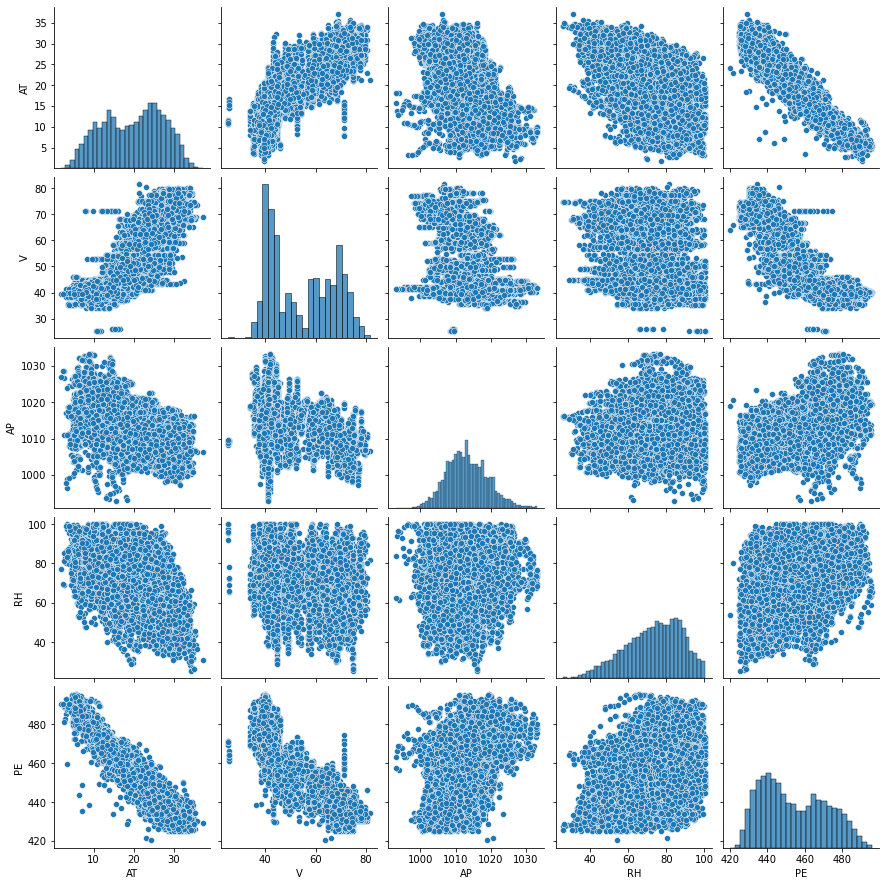

In [8]:
sns.pairplot(df, kind='scatter')

#### There is a clear linear relationship between AT and PE.
#### There is a clear linear relationship between V and PE.
#### There is a weak linear relationship between AP and PE.
#### There is a weak linear relationship between RH and PE.
#### AT and V seem to be correlated.

### iii. mean, median, range, first and third quartiles, interquartile ranges

In [9]:
df_des = df.describe()
df_des.loc['range'] = df_des.loc['max']-df_des.loc['min']
df_des.rename(index={'50%':'median'}, inplace=True)
df_des.loc['IQR'] = df_des.loc['75%']-df_des.loc['25%']
df_des.drop(labels='count', axis=0, inplace=True)
df_des.drop(labels='std', axis=0, inplace=True)
df_des

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


## c. Simple linear regression

In [10]:
# Predictor: AT
x1 = df['AT']
X1 = sm.add_constant(x1, prepend=True)
y1 = df['PE']
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
print(results1.summary(alpha=0.05))

# Predictor: V
x2 = df['V']
X2 = sm.add_constant(x2, prepend=True)
y2 = df['PE']
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

# Predictor: AP
x3 = df['AP']
X3 = sm.add_constant(x3, prepend=True)
y3 = df['PE']
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
print(results3.summary())

# Predictor: RH
x4 = df['RH']
X4 = sm.add_constant(x4, prepend=True)
y4 = df['PE']
model4 = sm.OLS(y4, X4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

#### Due to the fact that the p-values are all smaller than 0.05, each predictor in these simple regression models is statistically significant.

Text(0.5, 1.0, 'RH vs PE')

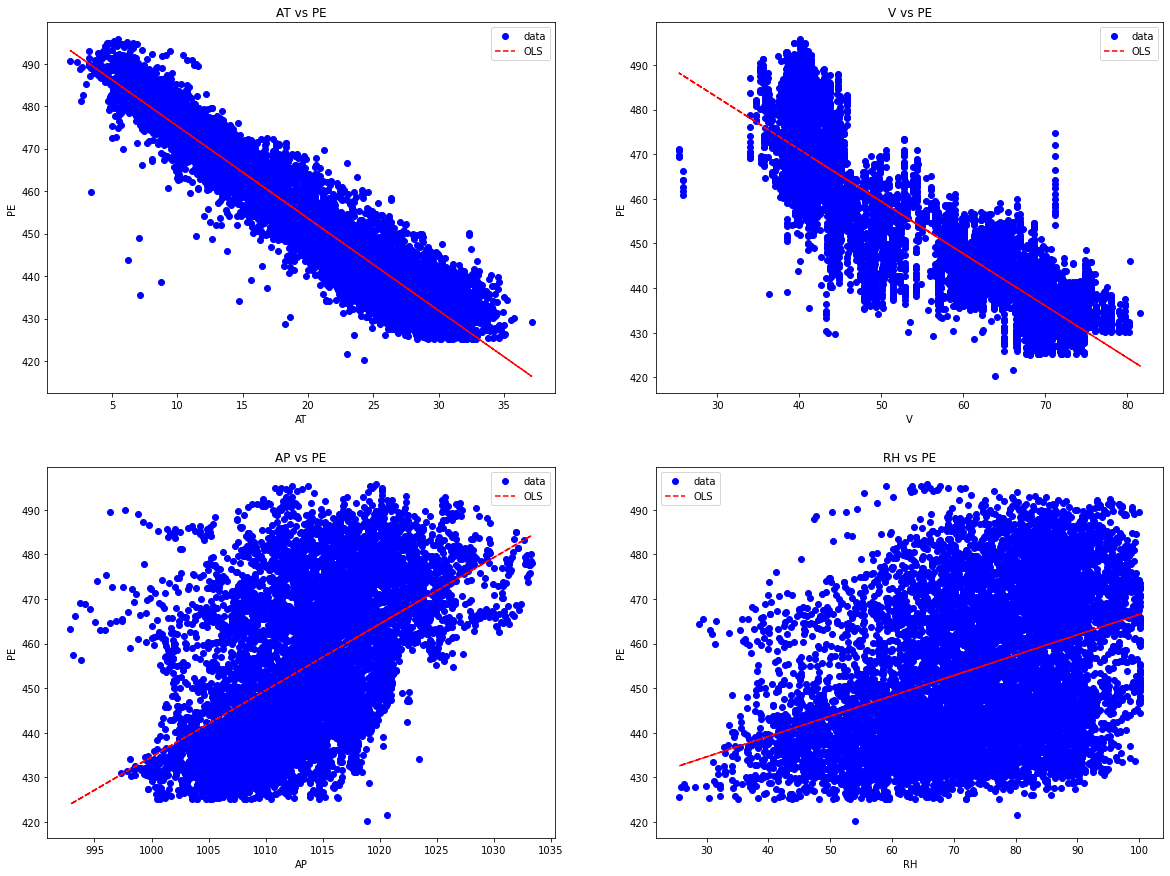

In [11]:
# Plots
fig1, ax1 =plt.subplots(2,2, figsize=(20, 15))

ax1[0,0].plot(x1, y1,'bo', label='data')
ax1[0,0].plot(x1, results1.fittedvalues,'r--', label='OLS')
ax1[0,0].legend()
ax1[0,0].set_xlabel('AT')
ax1[0,0].set_ylabel('PE')
ax1[0,0].set_title('AT vs PE')

ax1[0,1].plot(x2, y2, 'bo', label='data')
ax1[0,1].plot(x2, results2.fittedvalues, 'r--', label='OLS')
ax1[0,1].legend()
ax1[0,1].set_xlabel('V')
ax1[0,1].set_ylabel('PE')
ax1[0,1].set_title('V vs PE')

ax1[1,0].plot(x3, y3, 'bo', label='data')
ax1[1,0].plot(x3, results3.fittedvalues, 'r--', label='OLS')
ax1[1,0].legend()
ax1[1,0].set_xlabel('AP')
ax1[1,0].set_ylabel('PE')
ax1[1,0].set_title('AP vs PE')

ax1[1,1].plot(x4, y4, 'bo', label='data')
ax1[1,1].plot(x4, results4.fittedvalues, 'r--', label='OLS')
ax1[1,1].legend()
ax1[1,1].set_xlabel('RH')
ax1[1,1].set_ylabel('PE')
ax1[1,1].set_title('RH vs PE')


#### There are some outliers to remove from data.

In [12]:
# Remove outliers
df_z = df
z = np.abs(stats.zscore(df_z,axis=0)) #column
z_bool = z<2
df_no_out = df_z[z_bool.all(axis=1)]
df_no_out

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
...,...,...,...,...,...
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9566,24.48,69.45,1013.86,62.39,435.74


Text(0.5, 1.0, 'RH vs PE')

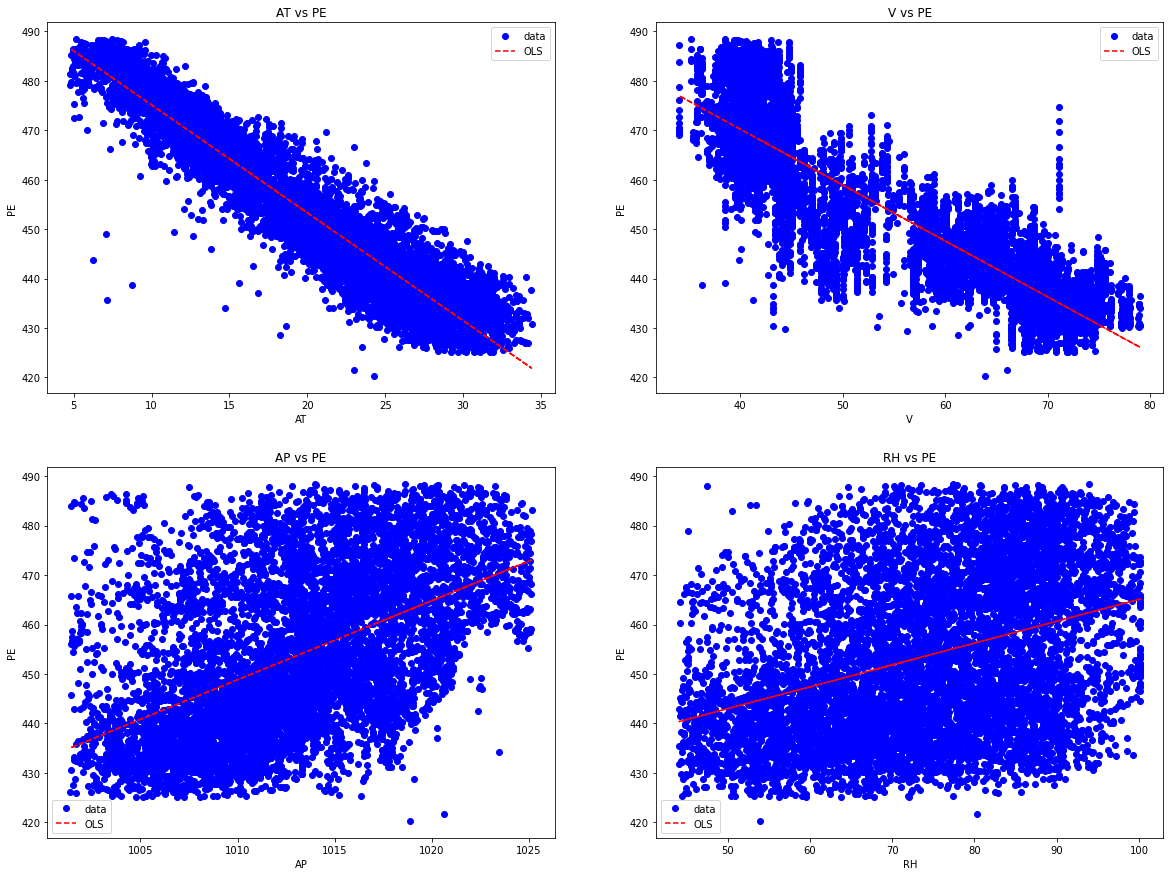

In [13]:
# Simple linear regression after removing outliers
x_1 = df_no_out['AT']
y_1 = df_no_out['PE']
x_2 = df_no_out['V']
y_2 = df_no_out['PE']
x_3 = df_no_out['AP']
y_3 = df_no_out['PE']
x_4 = df_no_out['RH']
y_4 = df_no_out['PE']

X_1 = sm.add_constant(x_1, prepend=True)
model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()

X_2 = sm.add_constant(x_2, prepend=True)
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()

X_3 = sm.add_constant(x_3, prepend=True)
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()

X_4 = sm.add_constant(x_4, prepend=True)
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()

# Plots
fig2, ax2 =plt.subplots(2,2, figsize=(20, 15))

ax2[0,0].plot(x_1, y_1,'bo', label='data')
ax2[0,0].plot(x_1, results_1.fittedvalues,'r--', label='OLS')
ax2[0,0].legend()
ax2[0,0].set_xlabel('AT')
ax2[0,0].set_ylabel('PE')
ax2[0,0].set_title('AT vs PE')

ax2[0,1].plot(x_2, y_2, 'bo', label='data')
ax2[0,1].plot(x_2, results_2.fittedvalues, 'r--', label='OLS')
ax2[0,1].legend()
ax2[0,1].set_xlabel('V')
ax2[0,1].set_ylabel('PE')
ax2[0,1].set_title('V vs PE')

ax2[1,0].plot(x_3, y_3, 'bo', label='data')
ax2[1,0].plot(x_3, results_3.fittedvalues, 'r--', label='OLS')
ax2[1,0].legend()
ax2[1,0].set_xlabel('AP')
ax2[1,0].set_ylabel('PE')
ax2[1,0].set_title('AP vs PE')

ax2[1,1].plot(x_4, y_4, 'bo', label='data')
ax2[1,1].plot(x_4, results_4.fittedvalues, 'r--', label='OLS')
ax2[1,1].legend()
ax2[1,1].set_xlabel('RH')
ax2[1,1].set_ylabel('PE')
ax2[1,1].set_title('RH vs PE')

## d. Multiple regression model

In [14]:
x_m = df.iloc[:, 0:4]
y_m = df['PE']
X_m = sm.add_constant(x_m, prepend=True)
model_m = sm.OLS(y_m, X_m)
results_m = model_m.fit()
print(results_m.summary(alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### F-statistic(3.114e+04) is large. And R-squared(0.929) is good, which means that the model can explain the data well. According to the p-values, all the four predictors are statistically significant. So we can reject the null hypothesis.

## e. Create a plot displaying the coefficients

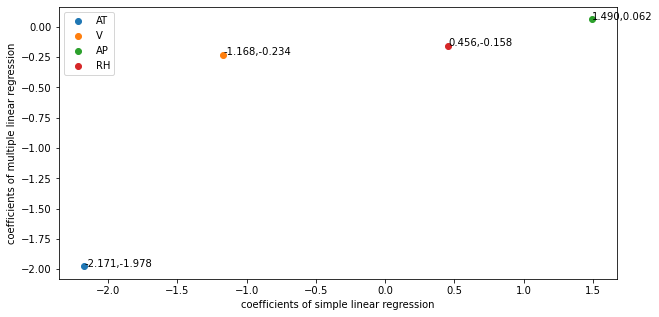

In [15]:
coeff_simple = [results1.params[1], results2.params[1], results3.params[1], results4.params[1]]
coeff_multiple = [results_m.params[1],results_m.params[2],results_m.params[3],results_m.params[4]]
labels=['AT','V','AP','RH']
plt.figure(figsize=(10, 5))
for i in range(0,4):
    plt.scatter(coeff_simple[i], coeff_multiple[i], label=labels[i])
    plt.annotate(format(coeff_simple[i],'.3f')+','+format(coeff_multiple[i],'.3f'), (coeff_simple[i],coeff_multiple[i]))
plt.legend()
plt.xlabel('coefficients of simple linear regression')
plt.ylabel('coefficients of multiple linear regression')
plt.show()

## f. Nonlinear

In [16]:
d1 = {'AT':df['AT'], 'AT**2':df['AT']**2,'AT**3':df['AT']**3}
df1= pd.DataFrame(data = d1)
d2 = {'V':df['V'], 'V**2':df['V']**2,'V**3':df['V']**3}
df2= pd.DataFrame(data = d2)
d3 = {'AP':df['AP'], 'AP**2':df['AP']**2,'AP**3':df['AP']**3}
df3= pd.DataFrame(data = d3)
d4 = {'RH':df['RH'], 'RH**2':df['RH']**2,'RH**3':df['RH']**3}
df4= pd.DataFrame(data = d4)

def polynomial_regression(x, y):
    X = sm.add_constant(x, prepend=True)
    model = sm.OLS(y, X)
    result = model.fit()
    print(result.summary())

polynomial_regression(df1, df['PE'])
polynomial_regression(df2, df['PE'])
polynomial_regression(df3, df['PE'])
polynomial_regression(df4, df['PE'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

#### There is evidence of nonlinear association between some predictors and the response.
#### According to the p-values of AT, AT ** 2 and AT ** 3, they are all statistically significant.
#### As for V, because the p-value of V ** 2 is larger than alpha(0.05), V ** 2 is statistically insignificant. But V and V ** 3 are statistically significant.
#### According to the p-values of AP, AP ** 2 and AP ** 3, they are all statistically significant.
#### According to the p-values of RH, RH ** 2 and RH ** 3, they are all statistically significant.

## g. Interaction

In [17]:
interac = PolynomialFeatures(degree=2, interaction_only=True)
xi = interac.fit_transform(df.iloc[:, 0:4]) ## include 1
Xi = pd.DataFrame(xi)
Xi.columns = list(interac.get_feature_names_out())
modeli = sm.OLS(df['PE'], Xi)
resulti = modeli.fit()
print(resulti.summary()) ## alpha=0.05

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

#### There is evidence of association of interaction of predictors with the response. 
#### According to the p-values, the interaction terms including AT * V, AT * RH, V * AP, AP * RH are statistically significant.

## h. Improve the model

In [18]:
# Data split
data_train = df.sample(frac = 0.7, replace = False, random_state=1, axis = 0)
data_test = df[~df.index.isin(data_train.index)]

### Involve all predictors:

In [19]:
# Involve all predictors
x_train = data_train.iloc[:, 0:4]
y_train = data_train['PE']
X_train = sm.add_constant(x_train, prepend=True)

x_test = data_test.iloc[:, 0:4]
y_test = data_test['PE']

model_all = sm.OLS(y_train, X_train)
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -19614.
No. Observations:                6698   AIC:                         3.924e+04
Df Residuals:                    6693   BIC:                         3.927e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.0617     11.583     38.423      0.0

### Involve all possible interaction terms and quadratic nonlinearities:

In [20]:
# Involve all possible interaction terms and quadratic nonlinearities
poly = PolynomialFeatures(degree=2)
x_p = poly.fit_transform(x_train)
X_p = pd.DataFrame(x_p)
X_p.columns = list(poly.get_feature_names_out())

y_train_df = pd.DataFrame(y_train)
Y_train = y_train_df.reset_index(drop=True)

model_p = sm.OLS(Y_train, X_p)
result_p = model_p.fit()
print(result_p.summary()) ## alpha=0.05

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7344.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -19163.
No. Observations:                6698   AIC:                         3.836e+04
Df Residuals:                    6683   BIC:                         3.846e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -6691.7160   1423.661     -4.700      0.0

#### According to the p-values, we should remove AT * AP, V * AP, V * RH. 
#### The p-value of AT is also larger than alpha, but due to the fact that the interaction term AT * V is statistically significant, we don’t remove AT.

### Remove insignificant variables:

In [21]:
X_remove = X_p.drop(['AT AP', 'V AP', 'V RH'],axis=1)
model_r = sm.OLS(Y_train, X_remove)
result_r = model_r.fit()
print(result_r.summary()) ## alpha=0.05

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9326.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:58:17   Log-Likelihood:                -19172.
No. Observations:                6698   AIC:                         3.837e+04
Df Residuals:                    6686   BIC:                         3.845e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -9588.9204   1093.141     -8.772      0.0

In [22]:
from statsmodels.tools.eval_measures import mse
# Involve all predictors:
print('Involve all predictors:')
train_mse_all = mse(y_train.values, result_all.predict(X_train).values, axis=0)
print('train MSE:', train_mse_all)

X_test = sm.add_constant(x_test, prepend=True)
y_test_df = pd.DataFrame(y_test)
Y_test = y_test_df.reset_index(drop=True)

test_mse_all = mse(result_all.predict(X_test).values, Y_test.values.flatten(), axis=0)
print('test MSE:', test_mse_all,'\n')


# Involve all possible interaction terms and quadratic nonlinearities:
print('Involve all possible interaction terms and quadratic nonlinearities:')
train_mse_p = mse(y_train.values, result_p.predict(X_p).values, axis=0)
print('train MSE:', train_mse_p)

poly_test = PolynomialFeatures(degree=2)
x_p_test = poly_test.fit_transform(x_test)
X_p_test = pd.DataFrame(x_p_test)
X_p_test.columns = list(poly_test.get_feature_names_out())

test_mse_p = mse(result_p.predict(X_p_test).values, Y_test.values.flatten(), axis=0)
print('test MSE:', test_mse_p,'\n')


# Remove insignificant variables:
print('Remove insignificant variables:')
train_mse_r = mse(y_train.values, result_r.predict(X_remove).values, axis=0)
print('train MSE:', train_mse_r)

X_remove_test = X_p_test.drop(['AT AP', 'V AP', 'V RH'],axis=1) 

test_mse_r = mse(result_r.predict(X_remove_test).values, Y_test.values.flatten(), axis=0)
print('test MSE:', test_mse_r)

Involve all predictors:
train MSE: 20.468603325193868
test MSE: 21.47222835908632 

Involve all possible interaction terms and quadratic nonlinearities:
train MSE: 17.890330390891254
test MSE: 18.63496823278172 

Remove insignificant variables:
train MSE: 17.9338595199984
test MSE: 18.647937634428544


## i. KNN Regression

### i. Using both normalized and raw features

Using raw features:
best k: 5
min test MSE: 16.851856338675958

Using normalized features:
best k: 4
min test MSE: 15.279462513066196


Text(0, 0.5, 'MSE')

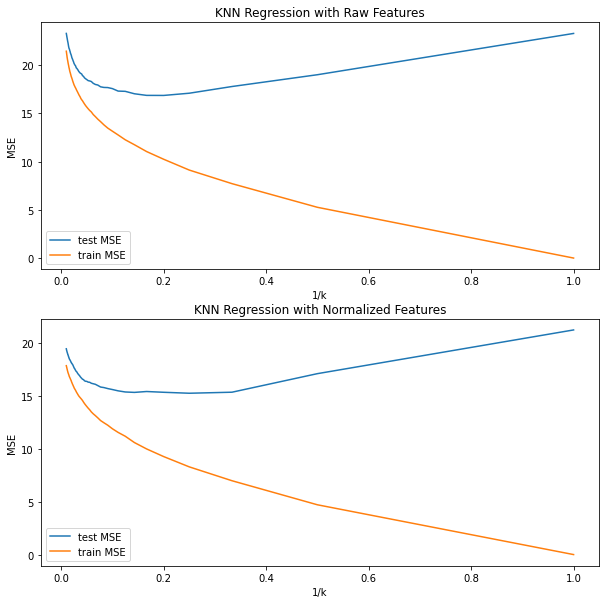

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train) ## use the same minimum and maximum
x_train_normalized = scaler.transform(x_train)
x_test_normalized = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsRegressor
def find_best_fit(train_x, train_y, test_x, test_y):
    min_test_mse = None
    best_k = None
    test_mse = []
    train_mse = []
    for k in range(1,101):
        neigh = KNeighborsRegressor(n_neighbors = k, weights = 'uniform', metric = 'minkowski', p = 2)
        neigh.fit(train_x, train_y)
        y_pred = neigh.predict(test_x)
        test_mse_k = mse(y_pred, test_y.values.flatten(), axis=0)
        test_mse.append(test_mse_k)
        
        train_mse_k = mse(train_y, neigh.predict(train_x), axis=0)
        train_mse.append(train_mse_k)

        if min_test_mse == None or test_mse_k < min_test_mse:
            min_test_mse = test_mse_k
            best_k = k
    return test_mse, train_mse, best_k, min_test_mse

print('Using raw features:')
MSE_test_raw, MSE_train_raw, best_k_raw, min_tMSE_raw = find_best_fit(x_train.values, y_train.values, x_test.values, Y_test)
print(f'best k: {best_k_raw}')
print(f'min test MSE: {min_tMSE_raw}')

print('\nUsing normalized features:')
MSE_test_normal, MSE_train_normal, best_k_normal, min_tMSE_normal = find_best_fit(x_train_normalized, y_train.values, x_test_normalized, Y_test)
print(f'best k: {best_k_normal}')
print(f'min test MSE: {min_tMSE_normal}')

ks = [1/k for k in range(1,101)]

#Plot
fig_KNN, ax_KNN =plt.subplots(2,1, figsize=(10, 10))

ax_KNN[0].plot(ks, MSE_test_raw, label='test MSE')
ax_KNN[0].plot(ks, MSE_train_raw, label='train MSE')
ax_KNN[0].legend()
ax_KNN[0].set_title("KNN Regression with Raw Features")
ax_KNN[0].set_xlabel('1/k')
ax_KNN[0].set_ylabel('MSE')

ax_KNN[1].plot(ks, MSE_test_normal, label='test MSE')
ax_KNN[1].plot(ks, MSE_train_normal, label='train MSE')
ax_KNN[1].legend()
ax_KNN[1].set_title("KNN Regression with Normalized Features")
ax_KNN[1].set_xlabel('1/k')
ax_KNN[1].set_ylabel('MSE')

## j. Compare KNN Regression Models and Linear Regression Models

In [24]:
print(f'Linear Regression:\nTest MSE of the linear regression model involving all possible interaction terms and quadratic nonlinearities is {test_mse_p}\n')

print(f'KNN Regression:\nTest MSE of KNN regression model using raw features is {min_tMSE_raw}')
print(f'Test MSE of KNN regression model using normalized features is {min_tMSE_normal}')

Linear Regression:
Test MSE of the linear regression model involving all possible interaction terms and quadratic nonlinearities is 18.63496823278172

KNN Regression:
Test MSE of KNN regression model using raw features is 16.851856338675958
Test MSE of KNN regression model using normalized features is 15.279462513066196


#### Therefore, KNN regression model using raw features or using normalized features performs better than linear regression models.

## ISLR: 2.4.1

### (a) We expect the performance of a flexible statistical learning method to be better. Because with a large sample we can get close to the true distribution and learn from the data well.

### (b) We expect the performance of a flexible statistical learning method to be worse. Because it’s likely to overfit.

### (c) We expect the performance of a flexible statistical learning method to be better. Because it can involve nonlinearities in the model to explain the data.

### (d) We expect the performance of a flexible statistical learning method to be worse. Because the noise level is very high, the model is more likely to overfit.

## ISLR: 2.4.7

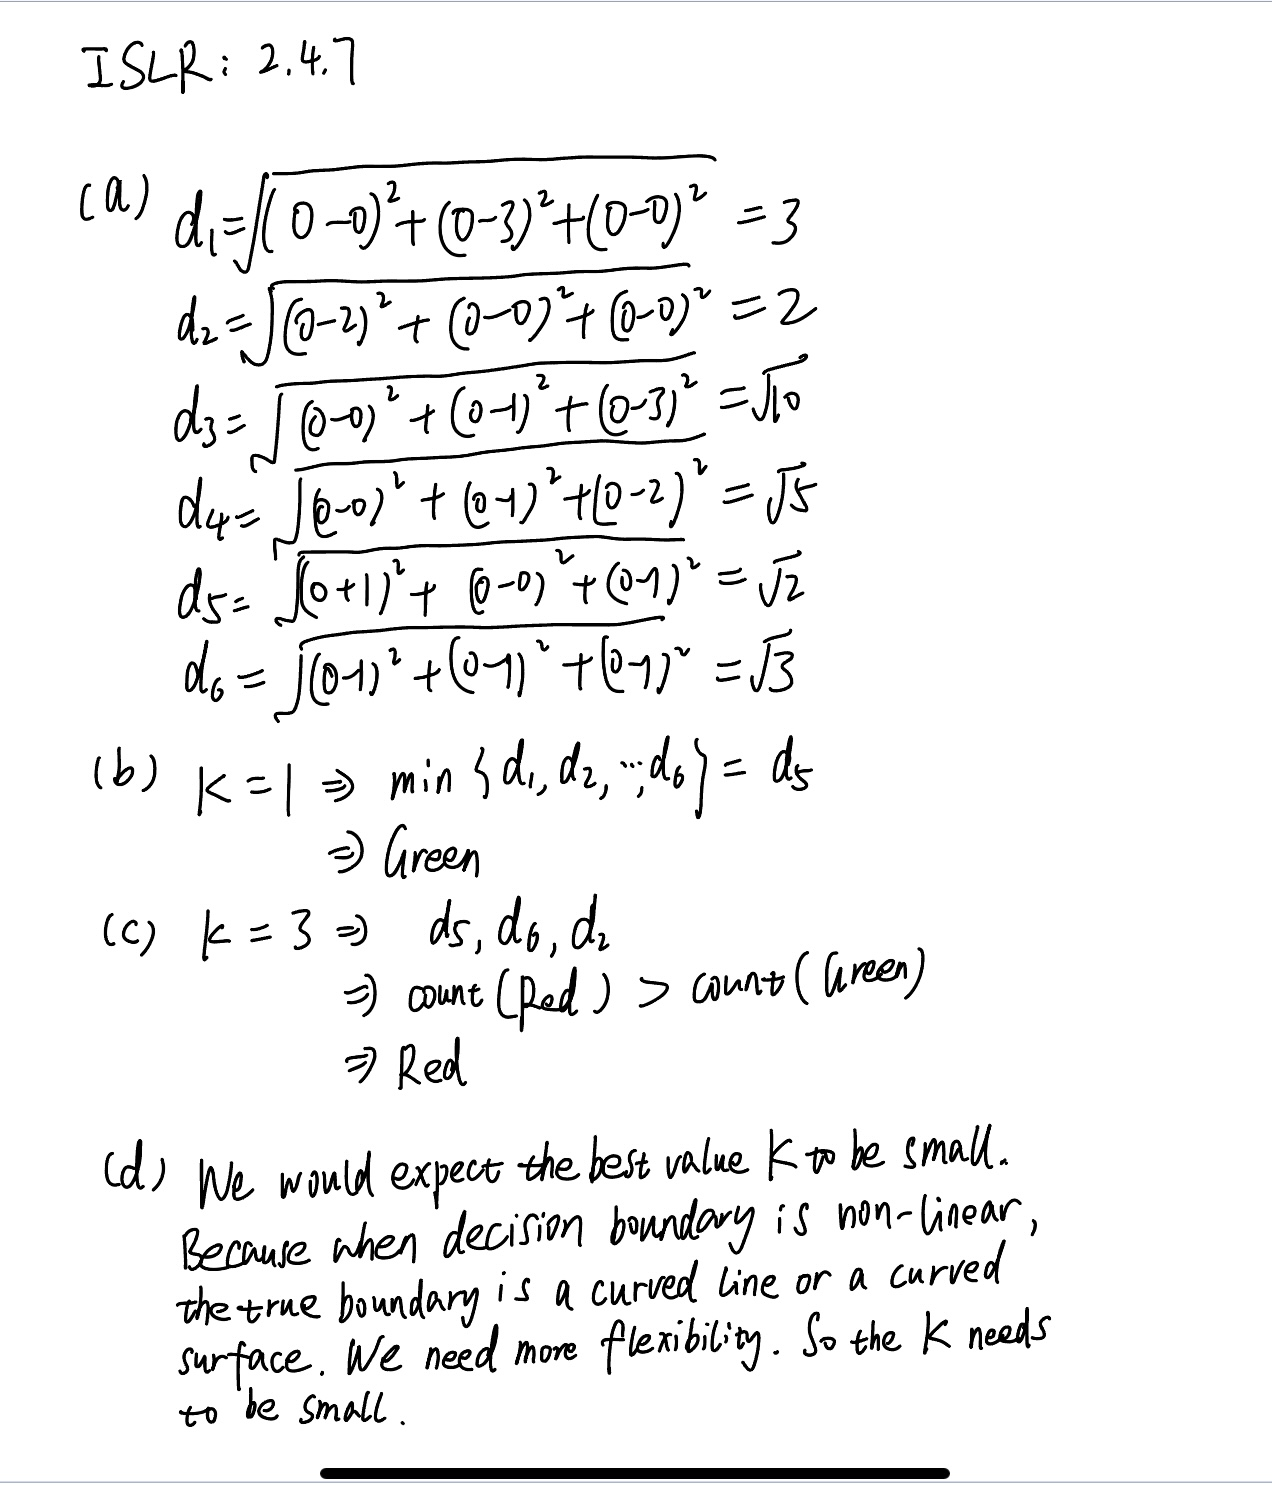